### 分類した水分子を表にする

In [1]:
import sys 
sys.path.append('..')

In [2]:
import numpy as np
import os
import pandas as pd
from lib.plot import plot_histogram
import matplotlib.pyplot as plt
from lib.path import get_analysis_results_labeled_water_path

In [6]:
DATA_INFO_START = 7
DATA_INFO_END = 10

In [3]:
def get_df_info(labeled_water_num_path):
    df = pd.read_csv(labeled_water_num_path)
    
    total_displaceable = df['displaceable_water_num'].sum()
    total_non_displaceable = df['non_displaceable_water_num'].sum()
    total_water_num = total_displaceable + total_non_displaceable

    summary_stats = df.describe()
    dis_mean = summary_stats['displaceable_water_num']['mean']
    dis_std = summary_stats['displaceable_water_num']['std']

    non_dis_mean = summary_stats['non_displaceable_water_num']['mean']
    non_dis_std = summary_stats['non_displaceable_water_num']['std']

    path_info = labeled_water_num_path.split("/")

    return df, path_info[DATA_INFO_START:DATA_INFO_END], int(total_water_num), f"dis: {int(total_displaceable)} ({dis_mean:.2f}±{dis_std:.2f})", f"non: {int(total_non_displaceable)} ({non_dis_mean:.2f}±{non_dis_std:.2f})"

In [4]:
ligand_voxel_nums = [10, 9, 8, 6, 4]
classifying_rule_names = ["WaterClassifyingRuleCenter", "WaterClassifyingRuleSurface"]
ligand_pocket_definer_names = ["LigandPocketDefinerGhecom", "LigandPocketDefinerOriginal"]

In [7]:
ligand_voxel_num = ligand_voxel_nums[2]
classifying_rule = classifying_rule_names[1]
ligand_pocket_definer = ligand_pocket_definer_names[1]

labeled_water_num_path = get_analysis_results_labeled_water_path(ligand_voxel_num, classifying_rule, ligand_pocket_definer)
df_info = get_df_info(labeled_water_num_path)

In [8]:
df_info[1:]

(['LigandPocketDefinerOriginal',
  'ligand_pocket_voxel_num_8',
  'WaterClassifyingRuleSurface'],
 74138,
 'dis: 38591 (14.19±7.69)',
 'non: 35547 (13.07±6.99)')

In [9]:
df = df_info[0]

In [10]:
df

,pdb_name,displaceable_water_num,non_displaceable_water_num
0,1qan,18.0,8.0
1,2oxd,11.0,10.0
2,3t0b,11.0,10.0
3,4sga,24.0,12.0
4,10gs,22.0,24.0
...,...,...,...
2714,5dey,18.0,20.0
2715,5dhu,3.0,4.0
2716,5dit,29.0,23.0
2717,5dlx,21.0,21.0


## 水分子のヒストグラム

Text(0, 0.5, 'Frequency')

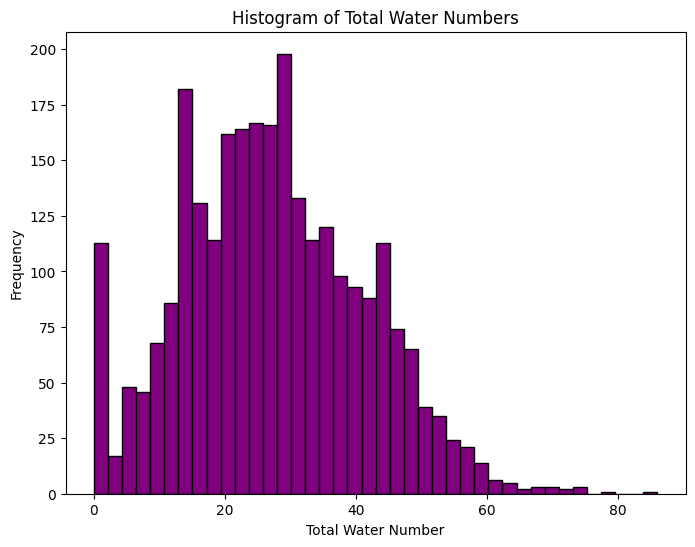

In [19]:
# 総水分子数の列を追加
df['total_water_num'] = df['displaceable_water_num'] + df['non_displaceable_water_num']

# ヒストグラムの作成
plt.figure(figsize=(8, 6))
plt.hist(df['total_water_num'], bins=40, color='purple', edgecolor='black')
plt.title('Histogram of Total Water Numbers')
plt.xlabel('Total Water Number')
plt.ylabel('Frequency')

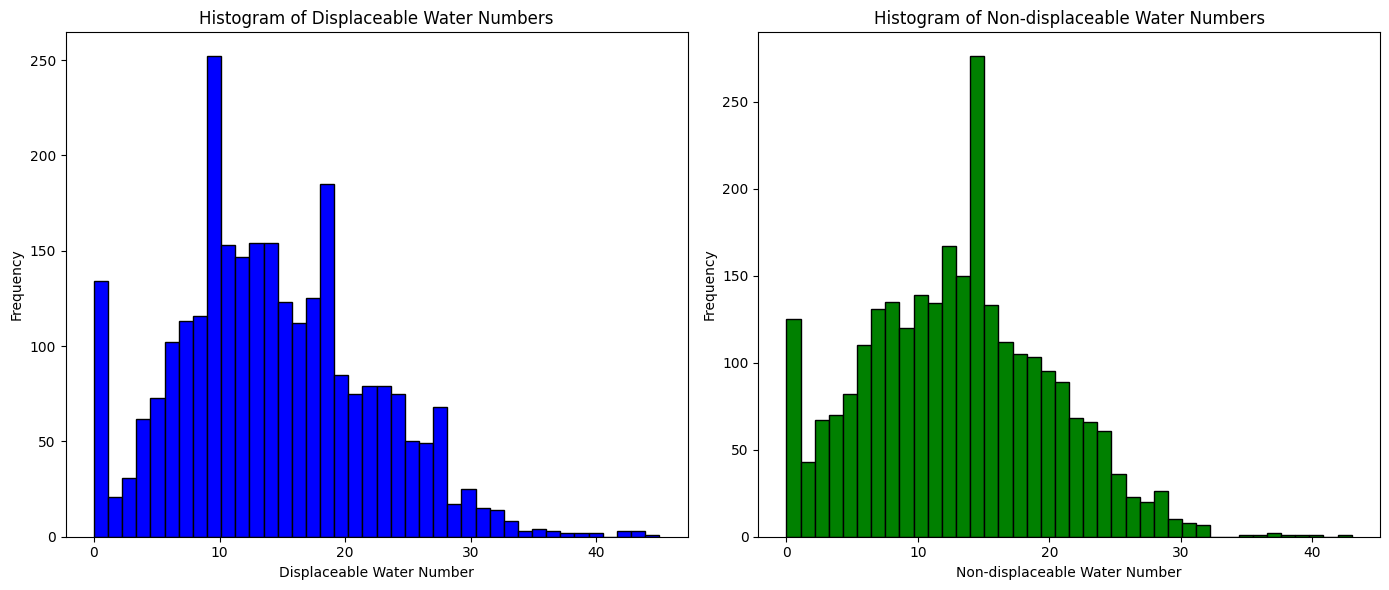

In [14]:
# Plot histograms
plt.figure(figsize=(14, 6))

# Histogram for displaceable_water_num
plt.subplot(1, 2, 1)
plt.hist(df['displaceable_water_num'], bins=40, color='blue', edgecolor='black')
plt.title('Histogram of Displaceable Water Numbers')
plt.xlabel('Displaceable Water Number')
plt.ylabel('Frequency')

# Histogram for non_displaceable_water_num
plt.subplot(1, 2, 2)
plt.hist(df['non_displaceable_water_num'], bins=40, color='green', edgecolor='black')
plt.title('Histogram of Non-displaceable Water Numbers')
plt.xlabel('Non-displaceable Water Number')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### dis, nonの水分子のpdbをゲット→たんぱく質ごとに数を数える→個数が違うやつを見つける

In [10]:
labeled_water_num_path_center = get_analysis_results_labeled_water_path(ligand_voxel_nums[0], classifying_rule_names[0], ligand_pocket_definer_names[1])
df_info_center = get_df_info(labeled_water_num_path_center)

center_total_water_nums = {}
for row in df_info_center[0].iterrows():
    total_water_num_in_protein = row[1]['displaceable_water_num'] + row[1]['non_displaceable_water_num']
    center_total_water_nums[row[1]['pdb_name']] = total_water_num_in_protein


In [11]:
labeled_water_num_path_surface = get_analysis_results_labeled_water_path(ligand_voxel_nums[0], classifying_rule_names[1], ligand_pocket_definer_names[1])
df_info_surface = get_df_info(labeled_water_num_path_surface)

surface_total_water_nums = {}
for row in df_info_surface[0].iterrows():
    total_water_num_in_protein = row[1]['displaceable_water_num'] + row[1]['non_displaceable_water_num']
    surface_total_water_nums[row[1]['pdb_name']] = total_water_num_in_protein

In [12]:
sum(center_total_water_nums.values())

104483.0

In [13]:
sum(surface_total_water_nums.values())

104483.0

In [14]:
for center_total_water_num, surface_total_water_num in zip(center_total_water_nums.items(), surface_total_water_nums.items()):
    if center_total_water_num[1] != surface_total_water_num[1]:
        print(center_total_water_num[0])
        print(center_total_water_num[1], surface_total_water_num[1])
        # if center_total_water_num.values() != surface_total_water_num.values():
        #     print(f"{center_total_water_num}")
